In [ ]:
import io
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [ ]:
embedding_layer = layers.Embedding(1000, 5) #number of nested elements inside of each of the elements in an array | COLUMNS
result = embedding_layer(tf.constant([1,2,3])) #total number of elements in the array | ROWS
print(result.numpy())
print()
print(result.numpy().shape)

[[ 0.02785654  0.01832472 -0.03968757  0.04133889  0.01083665]
 [ 0.01790055  0.0446982  -0.04099437  0.02480351  0.0113271 ]
 [ 0.00130992  0.03494116  0.01498825  0.01521292 -0.0177781 ]]

(3, 5)


In [ ]:
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k', #loading dataset
                                          split=(tfds.Split.TRAIN, tfds.Split.TEST), #defining split
                                          with_info = True, 
                                          as_supervised = True #We want the data along with the labels
                                          )

encoder = info.features['text'].encoder #Encoder is a reduced dimensional representaton of a set of words
#print(encoder.subwords[:20])  #Seeing the first 20 words of the dictionary

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXD4UUJ/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXD4UUJ/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXD4UUJ/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.
['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_']


These reviews are of different lengths and we don't have an identical length through each of the reviews and so when load elements into a matrix, we lead them by doing padding firt.

Take the longest reviews and make all the other words of same lengths by adding zeros to the end of each of those words.

In [ ]:
padded_shapes = ([None],())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
test_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

Defining the actual model

In [ ]:
embedding_dim = 16 #number of dimensions for our embedding layer
model = keras.Sequential([layers.Embedding(encoder.vocab_size, embedding_dim),
                          layers.GlobalAveragePooling1D(),
                          layers.Dense(1, activation = 'sigmoid'), #probability of a review being positive
                          ])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

We are going to train and dump the history of our training object

In [ ]:
history = model.fit(train_batches,epochs=10, validation_data = test_batches,validation_steps = 20)

Epoch 1/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.1804 - accuracy: 0.9410 - val_loss: 0.2031 - val_accuracy: 0.9350
Epoch 2/10
2500/2500 [==============================] - 14s 6ms/step - loss: 0.1740 - accuracy: 0.9438 - val_loss: 0.1923 - val_accuracy: 0.9250
Epoch 3/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.1636 - accuracy: 0.9475 - val_loss: 0.1675 - val_accuracy: 0.9300
Epoch 4/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.1562 - accuracy: 0.9496 - val_loss: 0.1487 - val_accuracy: 0.9550
Epoch 5/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.1492 - accuracy: 0.9538 - val_loss: 0.1567 - val_accuracy: 0.9600
Epoch 6/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.1409 - accuracy: 0.9558 - val_loss: 0.1006 - val_accuracy: 0.9750
Epoch 7/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.1389 - accuracy: 0.9587 - val_loss: 0.1041 - val_ac

Converting the history into a dictionary

In [ ]:
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1,len(acc)+1)
print(history_dict)

{'loss': [0.18041013181209564, 0.17395786941051483, 0.16358840465545654, 0.15624935925006866, 0.1492282748222351, 0.1408831626176834, 0.13891640305519104, 0.13131201267242432, 0.12547734379768372, 0.12105286121368408], 'accuracy': [0.9409999847412109, 0.9437999725341797, 0.9474800229072571, 0.9495599865913391, 0.9538000226020813, 0.9557600021362305, 0.9587200284004211, 0.9600800275802612, 0.9628000259399414, 0.9647600054740906], 'val_loss': [0.2030666172504425, 0.19230154156684875, 0.16752104461193085, 0.14871005713939667, 0.1567189246416092, 0.10059671103954315, 0.10410638898611069, 0.12133914977312088, 0.1338365525007248, 0.13690048456192017], 'val_accuracy': [0.9350000023841858, 0.925000011920929, 0.9300000071525574, 0.9549999833106995, 0.9599999785423279, 0.9750000238418579, 0.9800000190734863, 0.949999988079071, 0.949999988079071, 0.949999988079071]}


Plotting the test result

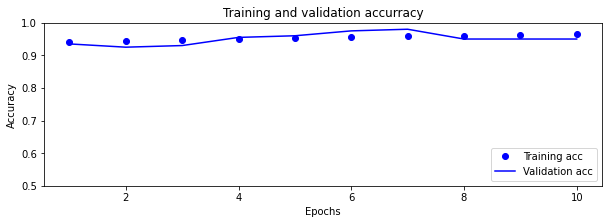

In [ ]:
plt.figure(figsize = (10,3))
plt.plot(epochs,acc,'bo',label="Training acc")
plt.plot(epochs,val_acc,'b',label="Validation acc")
plt.title("Training and validation accurracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim((0.5,1))
plt.show()

We could visualize the relationships between the words that are embedding learns

Epoch 1/10
2500/2500 [==============================] - 16s 6ms/step - loss: 0.6290 - accuracy: 0.6969 - val_loss: 0.5238 - val_accuracy: 0.8150
Epoch 2/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.4534 - accuracy: 0.8433 - val_loss: 0.4013 - val_accuracy: 0.8550
Epoch 3/10
2500/2500 [==============================] - 16s 6ms/step - loss: 0.3542 - accuracy: 0.8805 - val_loss: 0.3273 - val_accuracy: 0.8900
Epoch 4/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.3026 - accuracy: 0.8973 - val_loss: 0.3218 - val_accuracy: 0.8700
Epoch 5/10
2500/2500 [==============================] - 16s 6ms/step - loss: 0.2681 - accuracy: 0.9098 - val_loss: 0.2827 - val_accuracy: 0.8850
Epoch 6/10
2500/2500 [==============================] - 16s 6ms/step - loss: 0.2448 - accuracy: 0.9167 - val_loss: 0.2239 - val_accuracy: 0.9200
Epoch 7/10
2500/2500 [==============================] - 16s 6ms/step - loss: 0.2271 - accuracy: 0.9246 - val_loss: 0.2012 - val_ac

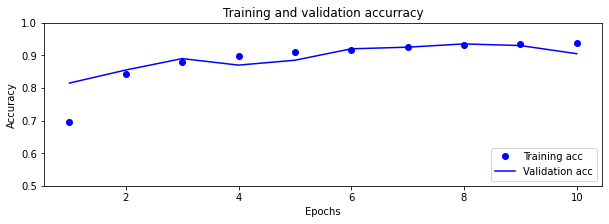

In [ ]:
def get_batch_data():

  (train_data, test_data), info = tfds.load('imdb_reviews/subwords8k', #loading dataset
                                            split=(tfds.Split.TRAIN, tfds.Split.TEST), #defining split
                                            with_info = True, 
                                            as_supervised = True #We want the data along with the labels
                                            )

  encoder = info.features['text'].encoder #Encoder is a reduced dimensional representaton of a set of words
  #print(encoder.subwords[:20])  #Seeing the first 20 words of the dictionary

  padded_shapes = ([None],())
  train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
  test_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

  return train_batches,test_batches, encoder

def get_model(encoder):
  embedding_dim = 16 #number of dimensions for our embedding layer
  model = keras.Sequential([layers.Embedding(encoder.vocab_size, embedding_dim),
                            layers.GlobalAveragePooling1D(),
                            layers.Dense(1, activation = 'sigmoid'), #probability of a review being positive
                            ])

  model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

  return model

def plot_history(history):
  history_dict = history.history
  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  epochs = range(1,len(acc)+1) #we start from 1 as 0 is for our padding
  print(history_dict)

  plt.figure(figsize = (10,3))
  plt.plot(epochs,acc,'bo',label="Training acc")
  plt.plot(epochs,val_acc,'b',label="Validation acc")
  plt.title("Training and validation accurracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.ylim((0.5,1))
  plt.show()

def retreieve_embeddings(model,encoder):
  out_vectors = io.open('vecs.tsv','w',encoding='utf-8') #take the encoder and dump it into a tsv file for later usage
  out_metadata = io.open('meta.tsv','w',encoding='utf-8') #take the encoder and dump it into a tsv file for later usage
  weights = model.layers[0].get_weights()[0]  #layer[0] is the embedding layer and get_weights()[0] is the first element of that layer

  for num, word in enumerate(encoder.subwords): #Taking out the vector and metadata 
    vec = weights[num+1] #we start from 1 as 0 is for our padding
    out_metadata.write(word + '\n')
    out_vectors.write('\t'.join([str(x) for x in vec])+'\n')

  out_vectors.close()
  out_metadata.close()

train_batches, test_batches, encoder = get_batch_data()
model = get_model(encoder)
history = model.fit(train_batches,epochs=10, validation_data = test_batches,validation_steps = 20)
plot_history(history)
retreieve_embeddings(model,encoder)

In [ ]:
def get_batch_data():

  (train_data, test_data), info = tfds.load('imdb_reviews/subwords8k', #loading dataset
                                            split=(tfds.Split.TRAIN, tfds.Split.TEST), #defining split
                                            with_info = True, 
                                            as_supervised = True #We want the data along with the labels
                                            )

  encoder = info.features['text'].encoder
  #print(encoder.subwords[:20])  #Seeing the first 20 words of the dictionary

  padded_shapes = ([None],())
  train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
  test_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

  return train_batches,test_batches, encoder

def get_model(encoder):
  embedding_dim = 16 #number of dimensions for our embedding layer
  model = keras.Sequential([layers.Embedding(encoder.vocab_size, embedding_dim),
                            layers.GlobalAveragePooling1D(),
                            layers.Dense(1, activation = 'sigmoid'), #probability of a review being positive
                            ])

  model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

  return model

def plot_history(history):
  history_dict = history.history
  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  epochs = range(1,len(acc)+1) #we start from 1 as 0 is for our padding
  print(history_dict)

  plt.figure(figsize = (10,3))
  plt.plot(epochs,acc,'bo',label="Training acc")
  plt.plot(epochs,val_acc,'b',label="Validation acc")
  plt.title("Training and validation accurracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.ylim((0.5,1))
  plt.show()

def retreieve_embeddings(model,encoder):
  out_vectors = io.open('vecs.tsv','w',encoding='utf-8') #take the encoder and dump it into a tsv file for later usage
  out_metadata = io.open('meta.tsv','w',encoding='utf-8') #take the encoder and dump it into a tsv file for later usage
  weights = model.layers[0].get_weights()[0]  #layer[0] is the embedding layer and get_weights()[0] is the first element of that layer

  for num, word in enumerate(encoder.subwords): #Taking out the vector and metadata 
    vec = weights[num+1] #we start from 1 as 0 is for our padding
    out_metadata.write(word + '\n')
    out_vectors.write('\t'.join([str(x) for x in vec])+'\n')

  out_vectors.close()
  out_metadata.close()

train_batches, test_batches, encoder = get_batch_data()
model = get_model(encoder)
history = model.fit(train_batches,epochs=10, validation_data = test_batches,validation_steps = 20)
#plot_history(history)
retreieve_embeddings(model,encoder)

Epoch 1/10
2500/2500 [==============================] - 18s 7ms/step - loss: 0.6364 - accuracy: 0.6998 - val_loss: 0.5478 - val_accuracy: 0.7550
Epoch 2/10
2500/2500 [==============================] - 16s 6ms/step - loss: 0.4654 - accuracy: 0.8395 - val_loss: 0.4425 - val_accuracy: 0.8400
Epoch 3/10
2500/2500 [==============================] - 16s 6ms/step - loss: 0.3637 - accuracy: 0.8788 - val_loss: 0.3240 - val_accuracy: 0.8550
Epoch 4/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.3098 - accuracy: 0.8962 - val_loss: 0.3173 - val_accuracy: 0.8750
Epoch 5/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.2738 - accuracy: 0.9078 - val_loss: 0.2771 - val_accuracy: 0.8800
Epoch 6/10
2500/2500 [==============================] - 15s 6ms/step - loss: 0.2516 - accuracy: 0.9132 - val_loss: 0.2004 - val_accuracy: 0.9450
Epoch 7/10
2500/2500 [==============================] - 16s 6ms/step - loss: 0.2317 - accuracy: 0.9230 - val_loss: 0.1641 - val_ac

After loading the vecs.tsv and meta.tsv files in this link https://projector.tensorflow.org/, We get a figure which visualizes all the word relations!

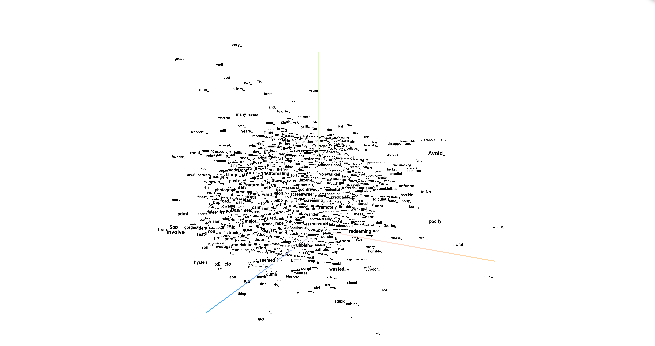